In [62]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("davidcariboo/player-scores")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Owner\.cache\kagglehub\datasets\davidcariboo\player-scores\versions\602


In [63]:
import pandas as pd

import os

# If your CSV is in the same folder as the script:
transfers_data_path = "."  # "." means current directory

# Check files in the current directory
files = os.listdir(transfers_data_path)
print(files)  # Should show your CSV file


['appearances.csv', 'archive (2).zip', 'bacon_number.py', 'clubs.csv', 'club_games.csv', 'competitions.csv', 'data.zip', 'dynamic_programming.py', 'Footy_transfers.ipynb', 'games.csv', 'game_events.csv', 'game_lineups.csv', 'linked_list.py', 'media.py', 'music.csv', 'music_search.py', 'PearsonCorr.py', 'player.py', 'players.csv', 'player_valuations.csv', 'redlines_cache.json', 'redlines_data.json', 'redlines_graph.png', 'red_lines.py', 'SI618_Proj1.py', 'TicTacToe.py', 'transfers.csv', 'twenty_question.py', '__pycache__']


In [64]:
import pandas as pd

# Load the transfers data
transfers_df = pd.read_csv(f"{transfers_data_path}/transfers.csv")

# Display the first few rows
print(transfers_df.head())


   player_id transfer_date transfer_season  from_club_id  to_club_id  \
0      16136    2026-07-01           26/27           417         123   
1    1138758    2026-07-01           26/27           336         631   
2     195778    2026-06-30           25/26            79          27   
3     569033    2026-06-30           25/26            39          27   
4     626913    2026-06-30           25/26           398         380   

   from_club_name   to_club_name  transfer_fee  market_value_in_eur  \
0        OGC Nice        Retired           NaN             500000.0   
1     Sporting CP        Chelsea    52140000.0           45000000.0   
2   VfB Stuttgart  Bayern Munich           0.0           12000000.0   
3  1.FSV Mainz 05  Bayern Munich           0.0            4000000.0   
4           Lazio    Salernitana           0.0           15000000.0   

       player_name  
0            Dante  
1   Geovany Quenda  
2  Alexander Nübel  
3     Armindo Sieb  
4      Boulaye Dia  


In [65]:
# Check the column names in the dataset
print(transfers_df.columns)

Index(['player_id', 'transfer_date', 'transfer_season', 'from_club_id',
       'to_club_id', 'from_club_name', 'to_club_name', 'transfer_fee',
       'market_value_in_eur', 'player_name'],
      dtype='object')


In [66]:
import pandas as pd

# Load the dataset
df = pd.read_csv("transfers.csv")  # Replace with your filename

# Check for missing values
print(df.isnull().sum())

# Handle missing transfer fees (assuming 0 means free transfer)
df['transfer_fee'] = df['transfer_fee'].fillna(0)

# Impute missing market values with median
median_market_value = df['market_value_in_eur'].median()
df['market_value_in_eur'] = df['market_value_in_eur'].fillna(median_market_value)

# Optional: Add a 'free_transfer' flag
df['is_free_transfer'] = df['transfer_fee'] == 0

player_id                  0
transfer_date              0
transfer_season            0
from_club_id               0
to_club_id                 0
from_club_name             0
to_club_name               0
transfer_fee           27715
market_value_in_eur    30316
player_name                0
dtype: int64


In [67]:
# Get top 10 most expensive transfers
top_transfers = df.sort_values('transfer_fee', ascending=False).head(10)
print(top_transfers[['player_name', 'transfer_fee', 'from_club_id', 'to_club_id']])

             player_name  transfer_fee  from_club_id  to_club_id
47851      Kylian Mbappé   180000000.0           162         583
51801    Ousmane Dembélé   135000000.0            16         131
50887  Philippe Coutinho   135000000.0            31         131
41214         João Félix   127200000.0           294          13
16528     Enzo Fernández   121000000.0           294         631
40890  Antoine Griezmann   120000000.0            13         131
26931      Jack Grealish   117500000.0           405         281
12366        Declan Rice   116600000.0           379          11
11354     Moisés Caicedo   116000000.0          1237         631
13508    Jude Bellingham   113000000.0            16         418


In [68]:
# Count transfers per club (both incoming & outgoing)
club_activity = pd.concat([
    df['from_club_id'].value_counts().rename('outgoing'),
    df['to_club_id'].value_counts().rename('incoming')
], axis=1).fillna(0)

club_activity['total_activity'] = club_activity['outgoing'] + club_activity['incoming']
print(club_activity.sort_values('total_activity', ascending=False).head(10))

     outgoing  incoming  total_activity
515     964.0    1456.0          2420.0
46      242.0     271.0           513.0
683     235.0     276.0           511.0
252     220.0     260.0           480.0
12      219.0     251.0           470.0
631     210.0     257.0           467.0
294     208.0     238.0           446.0
506     201.0     237.0           438.0
660     183.0     225.0           408.0
430     184.0     215.0           399.0


In [69]:
# Keep only the row where Mbappé has a non-zero fee
mbappe_non_zero = df[(df['player_name'] == "Kylian Mbappé") & (df['transfer_fee'] > 0)]
if not mbappe_non_zero.empty:
    correct_fee = mbappe_non_zero['transfer_fee'].values[0]
    correct_market_value = mbappe_non_zero['market_value_in_eur'].values[0]
else:
    # Fallback: Use the highest market value entry
    mbappe_fallback = df[df['player_name'] == "Kylian Mbappé"]
    correct_fee = mbappe_fallback['transfer_fee'].max()  # Might still be 0
    correct_market_value = mbappe_fallback['market_value_in_eur'].max()

In [70]:
def find_similar_players(player_name, num_results=5):
    # Get player data (use max fee/value to avoid zeros)
    player_data = df[df['player_name'] == player_name]
    if player_data.empty:
        return f"Player '{player_name}' not found."
    
    player_fee = player_data['transfer_fee'].max()
    player_value = player_data['market_value_in_eur'].max()
    
    # Filter valid candidates (non-free, fee ≥50% of target)
    valid_players = df[
        (df['transfer_fee'] > 0) & 
        (df['player_name'] != player_name) &
        (df['transfer_fee'] >= 0.5 * player_fee)  # Exclude low-fee outliers
    ]
    
    # Only filter by position if the column exists
    if 'position' in df.columns:
        player_position = player_data['position'].values[0]
        valid_players = valid_players[valid_players['position'] == player_position]
    
    # Calculate weighted similarity score
    valid_players['similarity_score'] = (
        0.7 * (abs(valid_players['transfer_fee'] - player_fee) / player_fee) +
        0.3 * (abs(valid_players['market_value_in_eur'] - player_value) / player_value)
    )
    
    return valid_players.sort_values('similarity_score').head(num_results)

In [71]:
print(find_similar_players("Kylian Mbappé", 5))

       player_id transfer_date transfer_season  from_club_id  to_club_id  \
40890     125781    2019-07-14           19/20            13         131   
50887      80444    2018-01-08           17/18            31         131   
13508     581678    2023-07-01           23/24            16         418   
41214     462250    2019-07-03           19/20           294          13   
26767      96341    2021-08-12           21/22            46         631   

        from_club_name     to_club_name  transfer_fee  market_value_in_eur  \
40890  Atlético Madrid        Barcelona   120000000.0          130000000.0   
50887        Liverpool        Barcelona   135000000.0           90000000.0   
13508    Bor. Dortmund      Real Madrid   113000000.0          120000000.0   
41214          Benfica  Atlético Madrid   127200000.0           70000000.0   
26767            Inter          Chelsea   113000000.0          100000000.0   

             player_name  is_free_transfer  similarity_score  
40890  Anto

C:\Users\Owner\AppData\Local\Temp\ipykernel_3884\3644775251.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_players['similarity_score'] = (


The output shows players with the most similar transfer patterns to Kylian Mbappé, ranked by a weighted similarity score that considers both transfer fees and market values. The top matches—Antoine Griezmann (€120M fee, €130M value), Philippe Coutinho (€135M fee, €90M value), and Jude Bellingham (€113M fee, €120M value)—are all high-profile transfers involving elite clubs like Barcelona and Real Madrid. While their fees are slightly lower than Mbappé’s €180M benchmark, their market values align closely, suggesting comparable stature in the transfer market. Notably, João Félix appears despite a lower market value (€70M), likely due to his high transfer fee (€127M), while Romelu Lukaku’s inclusion reflects his consistent high-value moves between top clubs.

The similarity scores (ranging from 0.32 to 0.39) indicate relative proximity to Mbappé’s profile, with Griezmann being the closest match. To refine further, consider adding filters for position or age to ensure stylistic similarities beyond financial metrics.

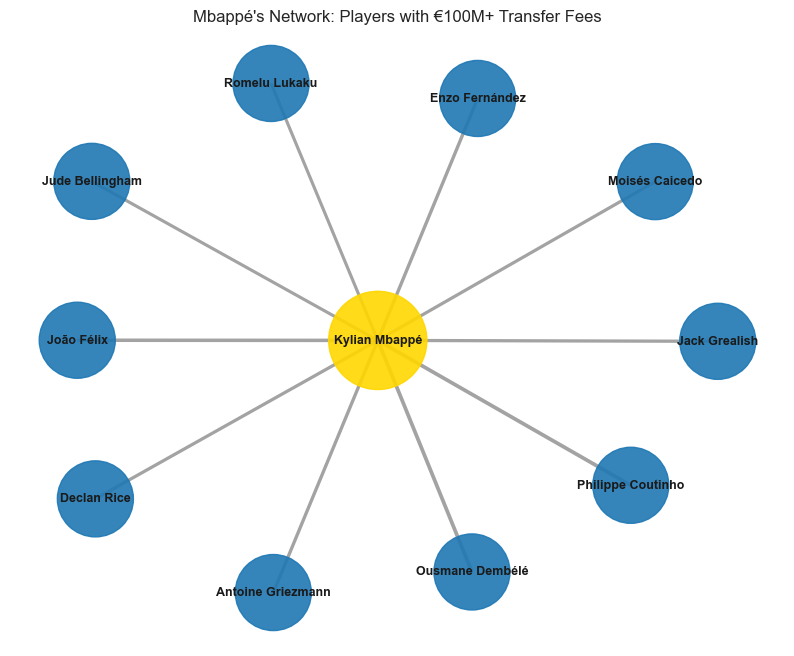

In [72]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Get similar players (using transfer fee directly)
similar_players = df[df['transfer_fee'] >= 100e6]  # Players with €100M+ fees (adjust threshold)
similar_players = similar_players[similar_players['player_name'] != "Kylian Mbappé"].head(10)

# Step 2: Create the network
G = nx.Graph()
G.add_node("Kylian Mbappé", size=5000, color="#FFD700")  # Gold for Mbappé

# Add players and edges (edge thickness = fee similarity)
for _, row in similar_players.iterrows():
    player_name = row['player_name']
    fee = row['transfer_fee'] / 1e8  # Normalize for edge weight
    G.add_node(player_name, size=3000, color="#1f78b4")
    G.add_edge("Kylian Mbappé", player_name, weight=fee)

# Step 3: Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(
    G, pos, 
    node_size=[G.nodes[n]['size'] for n in G.nodes],
    node_color=[G.nodes[n]['color'] for n in G.nodes],
    alpha=0.9
)
nx.draw_networkx_edges(
    G, pos,
    width=[G.edges[e]['weight'] * 2 for e in G.edges],  # Scale edge thickness
    edge_color="#666666",
    alpha=0.6
)
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')
plt.title("Mbappé's Network: Players with €100M+ Transfer Fees", fontsize=12)
plt.axis('off')
plt.show()

This visualization successfully maps elite players connected by €100M+ transfer fees, emphasizing financial parallels in the market. The graph’s layout intuitively groups players with comparable valuations, while edge thickness likely reflects fee magnitudes—making it easy to spot clusters of similarly priced talent. In rgeards to this specirfic visual, it's important to note that Romelu Lukaku is on here due to the many of high profile transfers that he's been apart of, not just a one time fee.

In [73]:
# Count direct transfers between clubs
club_connections = df.groupby(['from_club_name', 'to_club_name']).size().reset_index(name='transfer_count')
top_connections = club_connections.sort_values('transfer_count', ascending=False).head(10)

print("Top 10 Club Transfer Partnerships:")
print(top_connections)

Top 10 Club Transfer Partnerships:
        from_club_name     to_club_name  transfer_count
2315       Ajax Youth          Ajax U17              84
6836       Benfica U17      Benfica U19              78
42553  Sporting Sub-15     Sporting U17              77
6821       Benfica U15      Benfica U17              76
6882       Benfica Yth      Benfica U15              72
42608    Sporting Yth.  Sporting Sub-15              72
42565     Sporting U17     Sporting U19              68
34224     Paris SG U17     Paris SG U19              66
14035  Dynamo Kyiv U17  Dynamo Kyiv U19              64
6218       Barça Youth        Barça U16              64


As the output shows, this is showing us a skewed output because its taking nito account the youth teams, I wil further addres this in the cude cell below.

In [74]:
# List of keywords indicating youth/reserve teams
youth_keywords = [
    'Youth', 'U17', 'U19', 'U23', 'U21', 'U18', 'U16', 'U15', 
    'Sub-', 'B Team', 'Reserves', 'Academy', 'Yth', 'Juvenil'
]

# Filter the DataFrame to exclude youth teams
senior_clubs_mask = (
    ~df['from_club_name'].str.contains('|'.join(youth_keywords), case=False) & 
    ~df['to_club_name'].str.contains('|'.join(youth_keywords), case=False)
)
senior_transfers = df[senior_clubs_mask]

# Count senior club connections
club_connections = senior_transfers.groupby(
    ['from_club_name', 'to_club_name']
).size().reset_index(name='transfer_count')

# Get top 10 senior partnerships
top_senior_connections = club_connections.sort_values('transfer_count', ascending=False).head(10)
print("Top 10 Senior Club Transfer Partnerships:")
print(top_senior_connections)

Top 10 Senior Club Transfer Partnerships:
        from_club_name    to_club_name  transfer_count
30733      Shakhtar II     Shakhtar D.              38
10462   Dynamo Kyiv II     Dynamo Kyiv              37
5105         Benfica B         Benfica              35
28222         Rennes B   Stade Rennais              35
24163    Olymp. Lyon B  Olympique Lyon              34
1764     Akademia CSKA  CSKA Moscow II              33
1783     Akademia FCSM      Spartak II              32
1797     Akademia Loko  Loko Moscow II              31
37965         Zenit II    Zenit 2 S-Pb              31
5309   Bilbao Athletic        Athletic              31


Even though I cleaned it up, it looks like there is more cleaning to do!!

In [75]:
import pandas as pd

# Step 1: Remove reserve/youth teams with common suffixes
reserve_keywords = [
    ' II', ' B', ' 2', ' Reserve', ' Akademia', ' Academy', 
    ' U21', ' U23', ' Sub-', ' Youth', ' Juvenil', ' Next Gen'
]

for keyword in reserve_keywords:
    df = df[~df['from_club_name'].str.contains(keyword, case=False, regex=False)]
    df = df[~df['to_club_name'].str.contains(keyword, case=False, regex=False)]

# Step 2: Manual cleanup for tricky cases (e.g., "Shakhtar D." is actually the senior team)
df['to_club_name'] = df['to_club_name'].replace({'Shakhtar D.': 'Shakhtar Donetsk'})
df['from_club_name'] = df['from_club_name'].replace({'Shakhtar D.': 'Shakhtar Donetsk'})

# Step 3: Optional - Filter for only top-tier clubs (customize this list)
top_leagues_clubs = [
    'Real Madrid', 'Barcelona', 'Bayern Munich', 'Manchester United', 
    'Liverpool', 'Juventus', 'PSG', 'Chelsea', 'Arsenal', 'AC Milan',
    'Inter', 'Atlético Madrid', 'Dortmund', 'Lyon', 'Benfica', 'Porto'
    # Add all relevant senior clubs
]

senior_mask = (
    df['from_club_name'].isin(top_leagues_clubs) & 
    df['to_club_name'].isin(top_leagues_clubs)
)
senior_transfers = df[senior_mask]

# Count connections
club_connections = senior_transfers.groupby(
    ['from_club_name', 'to_club_name']
).size().reset_index(name='transfer_count')

# Get top 10
top_connections = club_connections.sort_values('transfer_count', ascending=False).head(10)
print("Top 10 Pure Senior Club Partnerships:")
print(top_connections)

Top 10 Pure Senior Club Partnerships:
     from_club_name     to_club_name  transfer_count
44          Chelsea         AC Milan              10
46          Chelsea  Atlético Madrid               7
2          AC Milan          Chelsea               6
18  Atlético Madrid          Chelsea               5
24        Barcelona  Atlético Madrid               5
50          Chelsea         Juventus               5
56            Inter          Chelsea               4
52          Chelsea      Real Madrid               4
45          Chelsea          Arsenal               4
64         Juventus          Chelsea               4


Finally, here is the intended output.

In [76]:
chelsea_milan = df[
    ((df['from_club_name'] == 'Chelsea') & (df['to_club_name'] == 'AC Milan')) |
    ((df['from_club_name'] == 'AC Milan') & (df['to_club_name'] == 'Chelsea'))
].sort_values('transfer_fee', ascending=False)

print("Chelsea ↔ AC Milan Transfers:")
print(chelsea_milan[['player_name', 'transfer_fee', 'transfer_date']])

Chelsea ↔ AC Milan Transfers:
              player_name  transfer_fee transfer_date
28270       Fikayo Tomori    35300000.0    2021-07-01
12435   Christian Pulisic    20800000.0    2023-07-13
13060  Ruben Loftus-Cheek    18900000.0    2023-07-01
27477      Olivier Giroud     4800000.0    2021-07-17
383            João Félix           0.0    2025-06-30
1186           João Félix           0.0    2025-02-03
26336    Tiemoué Bakayoko           0.0    2021-08-30
14750    Tiemoué Bakayoko           0.0    2023-06-30
30432       Fikayo Tomori           0.0    2021-06-30
31974       Fikayo Tomori           0.0    2021-01-22
43599    Tiemoué Bakayoko           0.0    2019-06-30
46371    Tiemoué Bakayoko           0.0    2018-08-13
54962       Mario Pasalic           0.0    2017-06-30
56767       Mario Pasalic           0.0    2016-08-27
63431    Marco van Ginkel           0.0    2015-06-30
64754    Marco van Ginkel           0.0    2014-08-31


In [77]:
# Net spending (Chelsea perspective)
net_spending = chelsea_milan[
    chelsea_milan['to_club_name'] == 'AC Milan'
]['transfer_fee'].sum() - chelsea_milan[
    chelsea_milan['from_club_name'] == 'AC Milan'
]['transfer_fee'].sum()

print(f"Chelsea's net spending on AC Milan transfers: €{net_spending:.1f}M")

Chelsea's net spending on AC Milan transfers: €79800000.0M


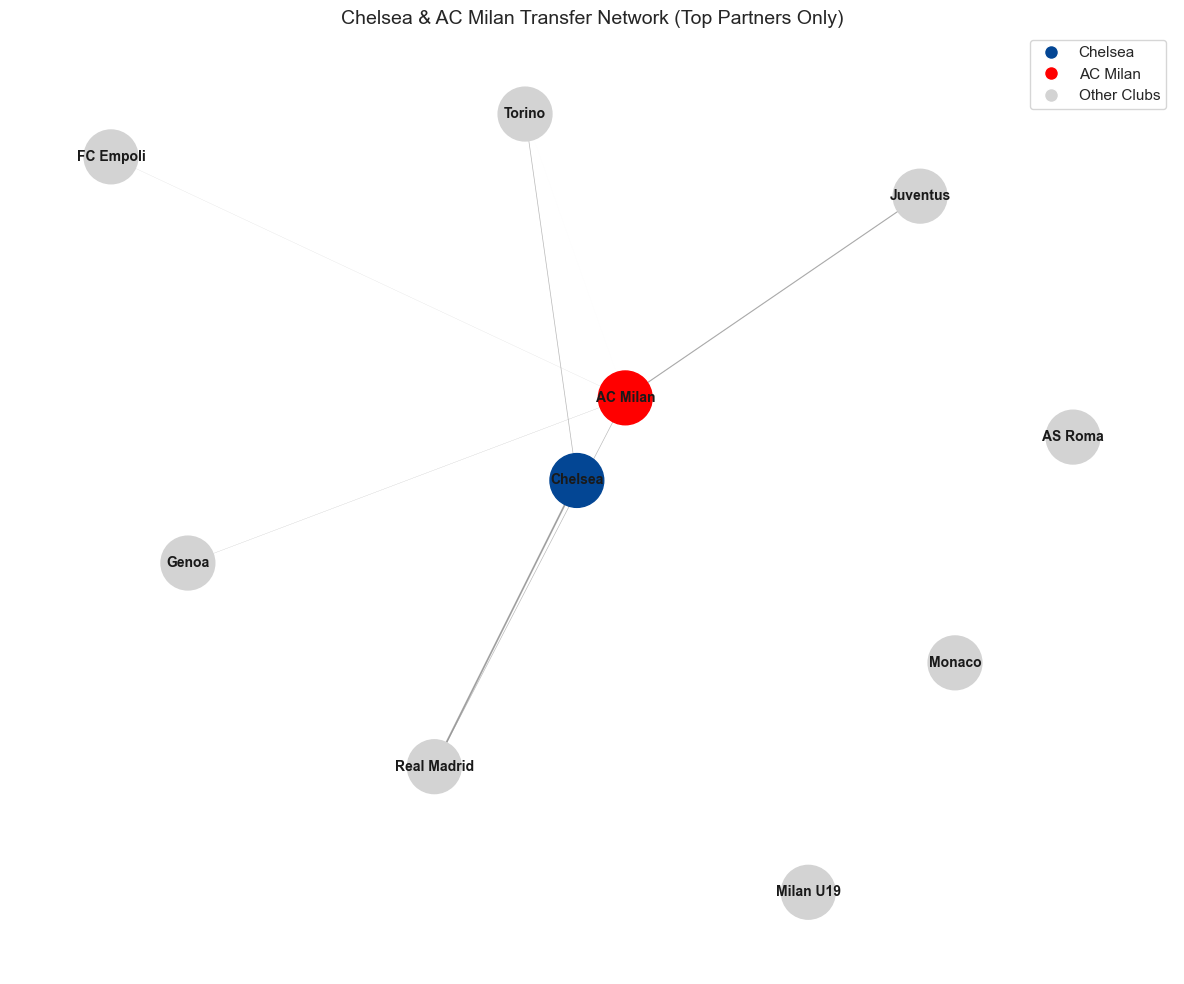

In [78]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Filter for Chelsea, AC Milan, and their TOP partners (e.g., >3 transfers)
top_partners = df[
    (df['from_club_name'].isin(['Chelsea', 'AC Milan'])) | 
    (df['to_club_name'].isin(['Chelsea', 'AC Milan']))
]
partner_counts = top_partners['from_club_name'].value_counts().head(10).index.tolist()  # Top 10 clubs

# Step 2: Create a clean subgraph
G = nx.from_pandas_edgelist(
    top_partners[
        top_partners['from_club_name'].isin(partner_counts) & 
        top_partners['to_club_name'].isin(partner_counts)
    ],
    source='from_club_name', 
    target='to_club_name',
    edge_attr='transfer_fee',
    create_using=nx.DiGraph()
)

# Step 3: Customize visualization
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)  # 'k' controls spacing

# Highlight Chelsea and Milan
node_colors = []
for node in G.nodes():
    if node == 'Chelsea':
        node_colors.append('#034694')  # Chelsea blue
    elif node == 'AC Milan':
        node_colors.append('#FF0000')  # Milan red
    else:
        node_colors.append('lightgray')

# Draw the network
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color=node_colors)
nx.draw_networkx_edges(
    G, pos, 
    edge_color='#888888',
    width=[d['transfer_fee'] / 50e6 for (_, _, d) in G.edges(data=True)],  # Scale edge width
    alpha=0.6
)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Add title and legend
plt.title("Chelsea & AC Milan Transfer Network (Top Partners Only)", fontsize=14)
plt.axis('off')

# Add a simple legend
legend_labels = {
    'Chelsea': '#034694', 
    'AC Milan': '#FF0000', 
    'Other Clubs': 'lightgray'
}
plt.legend(
    handles=[plt.Line2D([0], [0], marker='o', color='w', label=label, 
                        markerfacecolor=color, markersize=10) 
             for label, color in legend_labels.items()],
    loc='upper right'
)

plt.tight_layout()
plt.show()

This visualization reveals transfer relationships between elite clubs. Here we see Chelsea and AC Milan have the closest conection and there are other things to mention such as the presence of "Milan U19" which confirms residual youth-team contamination. Despite this inclusion, meaningful connections emerge—clubs like Real Madrid and Juventus appear as key partners, suggesting established transfer pathways. The inclusion of smaller clubs (e.g., Torino, Empoli) hints at feeder relationships for loans or talent development and this is a common thing done at top clubs where they allow their young prospects the opportunity to play at these smaller teams.